# Importing Libraries and Dataset

In [1]:
# Installing XGBoost
!pip install xgboost

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# Loading data from excel into a pandas dataframe

file_path = r'C:\Users\Lenovo\OneDrive\Masaüstü\IU Master\Case Study Model Engineering\Case Study\Copy of PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)

# Data Understanding

# 1- Data Quality

In [4]:
# Checking first few rows

data.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [5]:
# Checking Dataset information (data types, null-check)
# All data types are appropriate (datetime, numeric, categorical).

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [6]:
# Checking Descriptive statistics (for numeric columns)

# Mean amount: ~€202
# Min and Max of Amount: from €6 to €630 → may contain low-value test payments or high-value purchases
# Standard deviation of Amount: ~€96 → moderate variation

data.describe()

,Unnamed: 0,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000,50410.000000
mean,25204.500000,202.395715,0.202896,0.238266
std,14552.257872,96.274730,0.402160,0.426027
min,0.000000,6.000000,0.000000,0.000000
25%,12602.250000,133.000000,0.000000,0.000000
50%,25204.500000,201.000000,0.000000,0.000000
75%,37806.750000,269.000000,0.000000,0.000000
max,50409.000000,630.000000,1.000000,1.000000


# 2- Data Distribution Insights

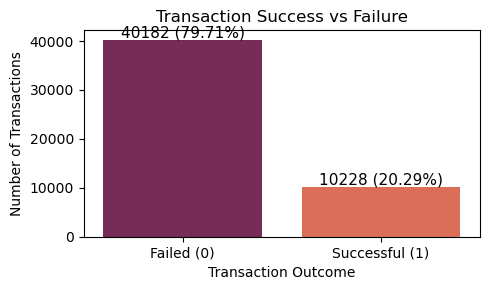

In [7]:
# Plotting success vs. fail distribution with percentage labels

# “Success mean: ~20% → only 1 in 5 transactions succeed”

# Calculating success counts and percentages
success_counts = data['success'].value_counts().sort_index()
success_labels = ['Failed (0)', 'Successful (1)']
success_percent = (success_counts / success_counts.sum()) * 100

# Plotting
plt.figure(figsize=(5,3))
sns.barplot(x=success_labels, y=success_counts.values, palette="rocket")

# Adding labels with value + percentage
for i, (count, pct) in enumerate(zip(success_counts.values, success_percent)):
    plt.text(i, count + 500, f"{count} ({pct:.2f}%)", ha='center', fontsize=11)

plt.title('Transaction Success vs Failure')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Outcome')
plt.tight_layout()
plt.show()

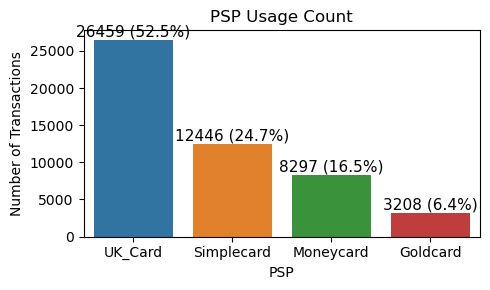

In [8]:
# Plotting top PSP by usage count:

psp_counts = data['PSP'].value_counts()
psp_percent = (psp_counts / psp_counts.sum()) * 100

plt.figure(figsize=(5,3))
sns.barplot(x=psp_counts.index, y=psp_counts.values)
plt.title('PSP Usage Count')
plt.xlabel('PSP')
plt.ylabel('Number of Transactions')

for i, (val, pct) in enumerate(zip(psp_counts.values, psp_percent)):
    plt.text(i, val + 500, f"{val} ({pct:.1f}%)", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

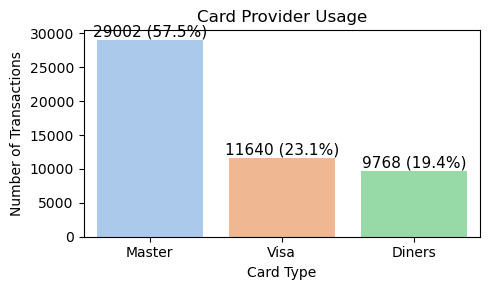

In [9]:
# Plotting Top card provider count:

card_counts = data['card'].value_counts()
card_percent = (card_counts / card_counts.sum()) * 100

plt.figure(figsize=(5,3))
sns.barplot(x=card_counts.index, y=card_counts.values, palette='pastel')
plt.title('Card Provider Usage')
plt.xlabel('Card Type')
plt.ylabel('Number of Transactions')

for i, (val, pct) in enumerate(zip(card_counts.values, card_percent)):
    plt.text(i, val + 500, f"{val} ({pct:.1f}%)", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

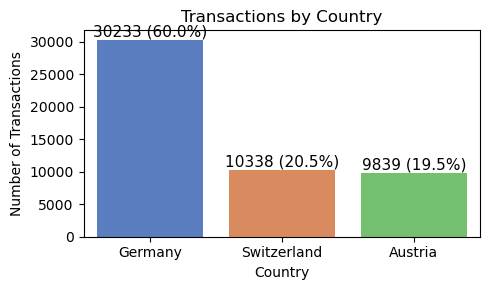

In [10]:
# Plotting Most transactions by country count:

country_counts = data['country'].value_counts()
country_percent = (country_counts / country_counts.sum()) * 100

plt.figure(figsize=(5,3))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='muted')
plt.title('Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')

for i, (val, pct) in enumerate(zip(country_counts.values, country_percent)):
    plt.text(i, val + 500, f"{val} ({pct:.1f}%)", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

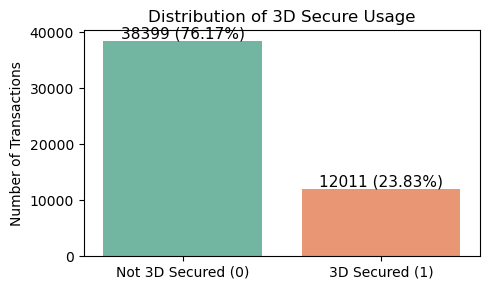

In [11]:
# Plotting Distribution of 3D Secure Usage (How often it's used)

# Counting of 3D secure usage
secure_counts = data['3D_secured'].value_counts()
secure_percent = (secure_counts / secure_counts.sum()) * 100
secure_labels = ['Not 3D Secured (0)', '3D Secured (1)']

plt.figure(figsize=(5,3))
sns.barplot(x=secure_labels, y=secure_counts.values, palette='Set2')
for i, (val, pct) in enumerate(zip(secure_counts.values, secure_percent)):
    plt.text(i, val + 500, f"{val} ({pct:.2f}%)", ha='center', fontsize=11)
plt.title('Distribution of 3D Secure Usage')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

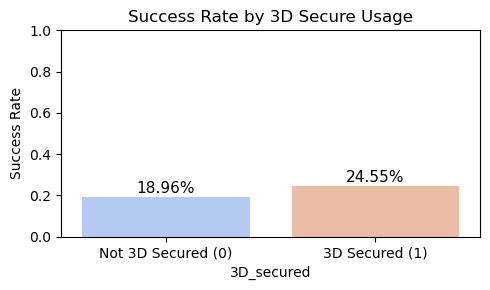

In [12]:
# Plotting Success Rate Based on 3D Secure Usage

# Calculating success rate grouped by 3D secure usage
secure_success = data.groupby('3D_secured')['success'].mean()

plt.figure(figsize=(5,3))
sns.barplot(x=secure_success.index, y=secure_success.values, palette='coolwarm')
plt.xticks([0, 1], ['Not 3D Secured (0)', '3D Secured (1)'])
for i, val in enumerate(secure_success.values):
    plt.text(i, val + 0.02, f"{val:.2%}", ha='center', fontsize=11)
plt.title('Success Rate by 3D Secure Usage')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

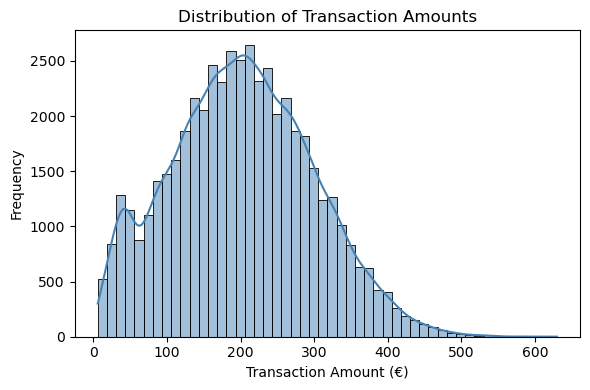

In [13]:
# Plotting Histogram of Transaction Amounts

plt.figure(figsize=(6,4))
sns.histplot(data['amount'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount (€)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

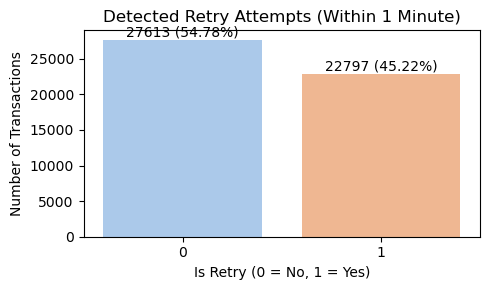

In [14]:
# Plotting and Flagging Retry Attempts

# Step 1: Sort by timestamp
data_sorted = data.sort_values('tmsp').reset_index(drop=True)

# Step 2: Create shifted columns (previous row's values)
data_sorted['prev_tmsp'] = data_sorted['tmsp'].shift(1)
data_sorted['prev_amount'] = data_sorted['amount'].shift(1)
data_sorted['prev_country'] = data_sorted['country'].shift(1)

# Step 3: Calculate time difference in seconds
data_sorted['time_diff'] = (data_sorted['tmsp'] - data_sorted['prev_tmsp']).dt.total_seconds()

# Step 4: Flag retry attempts
data_sorted['is_retry'] = (
    (data_sorted['amount'] == data_sorted['prev_amount']) &
    (data_sorted['country'] == data_sorted['prev_country']) &
    (data_sorted['time_diff'] <= 60)
).astype(int)


# Count values and percentages
retry_counts = data_sorted['is_retry'].value_counts().sort_index()
retry_percent = (retry_counts / retry_counts.sum()) * 100

# Create plot
plt.figure(figsize=(5, 3))
sns.countplot(x='is_retry', data=data_sorted, palette='pastel')

# Add value + percentage labels
for i, (count, pct) in enumerate(zip(retry_counts.values, retry_percent)):
    plt.text(i, count + 500, f"{count} ({pct:.2f}%)", ha='center', fontsize=10)

plt.title('Detected Retry Attempts (Within 1 Minute)')
plt.xlabel('Is Retry (0 = No, 1 = Yes)')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [15]:
# Current columns of data.sorted() Dataframe

data_sorted.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card,prev_tmsp,prev_amount,prev_country,time_diff,is_retry
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,NaT,NaN,NaN,NaN,0
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,2019-01-01 00:01:11,89.0,Germany,6.0,1
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,2019-01-01 00:01:17,89.0,Germany,92.0,0
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,2019-01-01 00:02:49,238.0,Germany,24.0,1
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,2019-01-01 00:03:13,238.0,Germany,80.0,0


# Data Preparation

# 1- Dropping Redundant Columns

In [16]:
# Columns to drop
cols_to_drop = ['Unnamed: 0', 'prev_tmsp', 'prev_amount', 'prev_country', 'time_diff']

# Dropping them from the data_sorted DataFrame
data_prepared = data_sorted.drop(columns=cols_to_drop)

# Checking result
data_prepared.head()

,tmsp,country,amount,success,PSP,3D_secured,card,is_retry
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0


# 2- Checking Missing Values

In [17]:
# Checking for missing values
missing_values = data_prepared.isnull().sum()

# Showing only columns that have missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

# 3- Converting Categorical Variables

In [18]:
# Using one-hot encoding and keep all category columns
data_encoded = pd.get_dummies(data_prepared, columns=['country', 'PSP', 'card'], drop_first=False)

# Checking the result
data_encoded.head()

,tmsp,amount,success,3D_secured,is_retry,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,2019-01-01 00:01:11,89,0,0,0,0,1,0,0,0,0,1,0,0,1
1,2019-01-01 00:01:17,89,1,0,1,0,1,0,0,0,0,1,0,0,1
2,2019-01-01 00:02:49,238,0,1,0,0,1,0,0,0,0,1,1,0,0
3,2019-01-01 00:03:13,238,1,1,1,0,1,0,0,0,0,1,1,0,0
4,2019-01-01 00:04:33,124,0,0,0,1,0,0,0,0,1,0,1,0,0


# 4- Feature Engineering

In [19]:
# Engineering from tmsp (timestamp)

# hour -> Maybe some PSPs perform worse at night?
data_encoded['hour'] = data_encoded['tmsp'].dt.hour

# day_of_week -> Payment failures could be higher on weekends
data_encoded['day_of_week'] = data_encoded['tmsp'].dt.dayofweek

# is_weekend -> Binary feature to help separate behavior
data_encoded['is_weekend'] = data_encoded['day_of_week'].isin([5, 6]).astype(int)

# Dropping tmsp column after extraction because models can’t learn from that directly
data_encoded = data_encoded.drop(columns=['tmsp'])

data_encoded.head()

In [21]:
data_encoded.head()

,amount,success,3D_secured,is_retry,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa,hour,day_of_week,is_weekend
0,89,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,89,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
2,238,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0
3,238,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0
4,124,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0


# 5- Split Dataset for Modeling

In [22]:
# Separating features and target
X = data_encoded.drop(columns=['success'])  # features
y = data_encoded['success']                # target

# Performing the split with stratification on the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Checking the shape and balance
print("Training set:", X_train.shape, y_train.value_counts(normalize=True))
print("Test set:", X_test.shape, y_test.value_counts(normalize=True))

Training set: (40328, 16) 0    0.797114
1    0.202886
Name: success, dtype: float64
Test set: (10082, 16) 0    0.797064
1    0.202936
Name: success, dtype: float64


# Modeling

# 1- Baseline Model

In [23]:
# Step 1: Predicting all 0s (fail)
y_pred_baseline = [0] * len(y_test)

# Step 2: Evaluating the predictions
print("📊 Baseline Model Performance (Always Predict 0):")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_baseline, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_baseline):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_baseline):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

📊 Baseline Model Performance (Always Predict 0):
Accuracy:  0.7971
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000

Confusion Matrix:
[[8036    0]
 [2046    0]]


# 2- Logistic Regression

In [24]:
# Starting from data_prepared and adding time-based features
data_logistic_ready = data_prepared.copy()

# Extracting time features
data_logistic_ready['hour'] = data_logistic_ready['tmsp'].dt.hour
data_logistic_ready['day_of_week'] = data_logistic_ready['tmsp'].dt.dayofweek
data_logistic_ready['is_weekend'] = data_logistic_ready['day_of_week'].isin([5, 6]).astype(int)

# Dropping the original timestamp
data_logistic_ready = data_logistic_ready.drop(columns=['tmsp'])

# Applying one-hot encoding with drop_first=True
data_logistic_ready = pd.get_dummies(
    data_logistic_ready,
    columns=['country', 'PSP', 'card'],
    drop_first=True
)

# Defining target and features
X_logistic = data_logistic_ready.drop(columns=['success'])
y_logistic = data_logistic_ready['success']

# Splitting into Train and Test Sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_logistic,
    y_logistic,
    test_size=0.2,
    stratify=y_logistic,
    random_state=42
)

# Logistic regression is sensitive to feature scales — so we will use StandardScaler
scaler = StandardScaler()

# Fitting on training set, transforming both
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)

# Training model

# Initializing logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Fitting the model
log_model.fit(X_train_scaled, y_train_log)

# Predicting on test data
y_pred_log = log_model.predict(X_test_scaled)

# Evaluating the model

print("📊 Logistic Regression Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test_log, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test_log, y_pred_log):.4f}")
print(f"Recall:    {recall_score(y_test_log, y_pred_log):.4f}")
print(f"F1 Score:  {f1_score(y_test_log, y_pred_log):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_log, y_pred_log))

📊 Logistic Regression Model Performance:
Accuracy:  0.7973
Precision: 0.5132
Recall:    0.0191
F1 Score:  0.0368

Confusion Matrix:
[[7999   37]
 [2007   39]]


# Logistic Regression with Amount Binning

In [25]:
# Copying from original clean data
data_binned = data_prepared.copy()

# Creating Time-based features
data_binned['hour'] = data_binned['tmsp'].dt.hour
data_binned['day_of_week'] = data_binned['tmsp'].dt.dayofweek
data_binned['is_weekend'] = data_binned['day_of_week'].isin([5, 6]).astype(int)

# Binning the amount Column

# Defining bins and labels
bin_edges = [0, 100, 200, 300, float('inf')]
bin_labels = ['low', 'medium', 'high', 'very_high']

# Applying binning
data_binned['amount_bin'] = pd.cut(data_binned['amount'], bins=bin_edges, labels=bin_labels)

# Dropping Unused Columns
data_binned = data_binned.drop(columns=['tmsp', 'amount'])

# One-Hot Encoding Categorical Variables
data_binned = pd.get_dummies(
    data_binned,
    columns=['country', 'PSP', 'card', 'amount_bin'],
    drop_first=True
)

# Defining features and target
X_binned = data_binned.drop(columns=['success'])
y_binned = data_binned['success']

# Train-Test Split (Stratified)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binned,
    y_binned,
    test_size=0.2,
    stratify=y_binned,
    random_state=42
)

# Feature Scaling

# Initialize and fit scaler
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)

# Train Logistic Regression on Binned Data
log_model_bin = LogisticRegression(max_iter=1000, random_state=42)
log_model_bin.fit(X_train_bin_scaled, y_train_bin)

# Predict and Evaluate

y_pred_bin = log_model_bin.predict(X_test_bin_scaled)

print("📊 Logistic Regression with Binned Amount:")
print(f"Accuracy:  {accuracy_score(y_test_bin, y_pred_bin):.4f}")
print(f"Precision: {precision_score(y_test_bin, y_pred_bin):.4f}")
print(f"Recall:    {recall_score(y_test_bin, y_pred_bin):.4f}")
print(f"F1 Score:  {f1_score(y_test_bin, y_pred_bin):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bin, y_pred_bin))

📊 Logistic Regression with Binned Amount:
Accuracy:  0.7978
Precision: 0.5412
Recall:    0.0225
F1 Score:  0.0432

Confusion Matrix:
[[7997   39]
 [2000   46]]


# 3- Random Forest

In [26]:
# Features and target for Random Forest
X_rf = data_encoded.drop(columns=['success'])
y_rf = data_encoded['success']

# Train-test splitting
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf,
    y_rf,
    test_size=0.2,
    stratify=y_rf,
    random_state=42
)

# Training Random Forest Classifier
# Initializing and fitting the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predicting on test set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluating
print("📊 Random Forest Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test_rf, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test_rf, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test_rf, y_pred_rf):.4f}")
print(f"F1 Score:  {f1_score(y_test_rf, y_pred_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))

📊 Random Forest Model Performance:
Accuracy:  0.7629
Precision: 0.3256
Recall:    0.1569
F1 Score:  0.2117

Confusion Matrix:
[[7371  665]
 [1725  321]]


# 4- XGBoost

In [27]:
# Initializing the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Training the model using the same data as Random Forest
xgb_model.fit(X_train_rf, y_train_rf)

# Predicting
y_pred_xgb = xgb_model.predict(X_test_rf)

# Evaluating
print("📊 XGBoost Model Performance:")
print(f"Accuracy:  {accuracy_score(y_test_rf, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test_rf, y_pred_xgb):.4f}")
print(f"Recall:    {recall_score(y_test_rf, y_pred_xgb):.4f}")
print(f"F1 Score:  {f1_score(y_test_rf, y_pred_xgb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_xgb))

📊 XGBoost Model Performance:
Accuracy:  0.7963
Precision: 0.4892
Recall:    0.0890
F1 Score:  0.1505

Confusion Matrix:
[[7846  190]
 [1864  182]]


In [28]:
# Results of Model performance metrics
data = {
    'Model': ['Baseline (All Fail)', 'Logistic (Binned)', 'XGBoost', 'Random Forest'],
    'Accuracy': [0.7971, 0.7978, 0.7963, 0.7629],
    'Precision': [0.0000, 0.5412, 0.4892, 0.3256],
    'Recall': [0.0000, 0.0225, 0.0890, 0.1569],
    'F1 Score': [0.0000, 0.0432, 0.1505, 0.2117],
    'Successes Predicted': [0, 46, 182, 321]
}

# Creating DataFrame
performance_df = pd.DataFrame(data)

# Displaying the table
performance_df

,Model,Accuracy,Precision,Recall,F1 Score,Successes Predicted
0,Baseline (All Fail),0.7971,0.0000,0.0000,0.0000,0
1,Logistic (Binned),0.7978,0.5412,0.0225,0.0432,46
2,XGBoost,0.7963,0.4892,0.0890,0.1505,182
3,Random Forest,0.7629,0.3256,0.1569,0.2117,321


# 5- Cost Sensitive Model (Cost Based Evaluation)

Cost Based Evaluation for Baseline Model

In [29]:
# Predicting all 0s (failures)
y_pred_baseline = [0] * len(y_test_rf)

# Creating baseline evaluation DataFrame
eval_base = X_test_rf.copy()
eval_base['actual_success'] = y_test_rf.values
eval_base['pred_success'] = y_pred_baseline  # Always 0

# Reusing PSP extraction logic
def get_psp(row):
    if 'PSP_Moneycard' in row and row['PSP_Moneycard'] == 1: return 'Moneycard'
    if 'PSP_Goldcard' in row and row['PSP_Goldcard'] == 1: return 'Goldcard'
    if 'PSP_UK_Card' in row and row['PSP_UK_Card'] == 1: return 'UK_Card'
    if 'PSP_Simplecard' in row and row['PSP_Simplecard'] == 1: return 'Simplecard'
    return 'Unknown'

eval_base['PSP_name'] = eval_base.apply(get_psp, axis=1)

# Applying failure fee only (since we always predict 0)
failure_fees = {
    'Moneycard': 2.0,
    'Goldcard': 5.0,
    'UK_Card': 1.0,
    'Simplecard': 0.5
}

eval_base['predicted_cost'] = eval_base['PSP_name'].map(failure_fees)

# Calculating cost metrics
total_cost_base = eval_base['predicted_cost'].sum()
avg_cost_base = eval_base['predicted_cost'].mean()
# Since it predicts no successes:
cost_per_success_base = float('inf')  # Undefined or infinite

# Final output
print("💰 Cost-Based Evaluation (Baseline - Predict All 0):")
print(f"Total Cost: €{total_cost_base:.2f}")
print(f"Average Cost per Transaction: €{avg_cost_base:.2f}")
print(f"Cost per Successful Transaction: ∞ (no successes predicted)")

💰 Cost-Based Evaluation (Baseline - Predict All 0):
Total Cost: €13205.50
Average Cost per Transaction: €1.31
Cost per Successful Transaction: ∞ (no successes predicted)


Cost Based Evaluation for Logistic Regression Model

In [30]:
# Creating a fresh copy of X_test for logistic evaluation
eval_log = X_test_log.copy()

# Adding actual and predicted values
eval_log['actual_success'] = y_test_log.values
eval_log['pred_success'] = y_pred_bin  # Using your binned version

# Reconstructing PSP name from one-hot encoded columns
def get_psp(row):
    if 'PSP_Moneycard' in row and row['PSP_Moneycard'] == 1: return 'Moneycard'
    if 'PSP_Goldcard' in row and row['PSP_Goldcard'] == 1: return 'Goldcard'
    if 'PSP_UK_Card' in row and row['PSP_UK_Card'] == 1: return 'UK_Card'
    if 'PSP_Simplecard' in row and row['PSP_Simplecard'] == 1: return 'Simplecard'
    return 'Unknown'

eval_log['PSP_name'] = eval_log.apply(get_psp, axis=1)

# Assigning cost based on prediction
success_fees = {
    'Moneycard': 5.0,
    'Goldcard': 10.0,
    'UK_Card': 3.0,
    'Simplecard': 1.0
}
failure_fees = {
    'Moneycard': 2.0,
    'Goldcard': 5.0,
    'UK_Card': 1.0,
    'Simplecard': 0.5
}

def compute_cost(row):
    psp = row['PSP_name']
    if row['pred_success'] == 1:
        return success_fees.get(psp, 0)
    else:
        return failure_fees.get(psp, 0)

eval_log['predicted_cost'] = eval_log.apply(compute_cost, axis=1)

# Calculating cost metrics
total_cost_log = eval_log['predicted_cost'].sum()
avg_cost_log = eval_log['predicted_cost'].mean()
successful_preds_log = eval_log[(eval_log['pred_success'] == 1) & (eval_log['actual_success'] == 1)]
cost_per_success_log = total_cost_log / len(successful_preds_log) if len(successful_preds_log) > 0 else float('inf')

# Final print
print("💰 Cost-Based Evaluation (Logistic Regression w/ Binned Amount):")
print(f"Total Cost: €{total_cost_log:.2f}")
print(f"Average Cost per Transaction: €{avg_cost_log:.2f}")
print(f"Cost per Successful Transaction: €{cost_per_success_log:.2f}")

💰 Cost-Based Evaluation (Logistic Regression w/ Binned Amount):
Total Cost: €9775.50
Average Cost per Transaction: €0.97
Cost per Successful Transaction: €212.51


Cost Based Evaluation for Random Forest Model

In [31]:
# Reattaching PSP and success labels to predictions
eval_df = X_test_rf.copy()
eval_df['actual_success'] = y_test_rf.values
eval_df['pred_success'] = y_pred_rf

# Adding Transaction Fee Logic

# Defining PSP fee structures
success_fees = {
    'Moneycard': 5.0,
    'Goldcard': 10.0,
    'UK_Card': 3.0,
    'Simplecard': 1.0
}

failure_fees = {
    'Moneycard': 2.0,
    'Goldcard': 5.0,
    'UK_Card': 1.0,
    'Simplecard': 0.5
}

# Getting the actual PSP used in each transaction
# This is reconstructed from one-hot columns
def get_psp(row):
    if row['PSP_Moneycard'] == 1: return 'Moneycard'
    if row['PSP_Goldcard'] == 1: return 'Goldcard'
    if row['PSP_UK_Card'] == 1: return 'UK_Card'
    if row['PSP_Simplecard'] == 1: return 'Simplecard'
    return 'Unknown'

eval_df['PSP_name'] = eval_df.apply(get_psp, axis=1)

# Assignning cost based on prediction outcome
def compute_cost(row):
    psp = row['PSP_name']
    if row['pred_success'] == 1:
        return success_fees[psp]
    else:
        return failure_fees[psp]

eval_df['predicted_cost'] = eval_df.apply(compute_cost, axis=1)

total_cost = eval_df['predicted_cost'].sum()
avg_cost_per_transaction = eval_df['predicted_cost'].mean()
successful_preds = eval_df[(eval_df['pred_success'] == 1) & (eval_df['actual_success'] == 1)]
cost_per_success = total_cost / len(successful_preds) if len(successful_preds) > 0 else float('inf')

print("💰 Cost-Based Evaluation (Random Forest):")
print(f"Total Cost: €{total_cost:.2f}")
print(f"Average Cost per Transaction: €{avg_cost_per_transaction:.2f}")
print(f"Cost per Successful Transaction: €{cost_per_success:.2f}")

💰 Cost-Based Evaluation (Random Forest):
Total Cost: €15870.00
Average Cost per Transaction: €1.57
Cost per Successful Transaction: €49.44


Cost Based Evaluation for XGBoost Model

In [32]:
# Creating a fresh copy of test data
eval_xgb = X_test_rf.copy()

# Adding actual and predicted outcomes
eval_xgb['actual_success'] = y_test_rf.values
eval_xgb['pred_success'] = y_pred_xgb  # XGBoost predictions

# Reconstructing PSP name
def get_psp(row):
    if 'PSP_Moneycard' in row and row['PSP_Moneycard'] == 1: return 'Moneycard'
    if 'PSP_Goldcard' in row and row['PSP_Goldcard'] == 1: return 'Goldcard'
    if 'PSP_UK_Card' in row and row['PSP_UK_Card'] == 1: return 'UK_Card'
    if 'PSP_Simplecard' in row and row['PSP_Simplecard'] == 1: return 'Simplecard'
    return 'Unknown'

eval_xgb['PSP_name'] = eval_xgb.apply(get_psp, axis=1)

# Applying fee structure
success_fees = {
    'Moneycard': 5.0,
    'Goldcard': 10.0,
    'UK_Card': 3.0,
    'Simplecard': 1.0
}

failure_fees = {
    'Moneycard': 2.0,
    'Goldcard': 5.0,
    'UK_Card': 1.0,
    'Simplecard': 0.5
}

def compute_cost(row):
    psp = row['PSP_name']
    return success_fees[psp] if row['pred_success'] == 1 else failure_fees[psp]

eval_xgb['predicted_cost'] = eval_xgb.apply(compute_cost, axis=1)

# Calculating cost metrics
total_cost_xgb = eval_xgb['predicted_cost'].sum()
avg_cost_xgb = eval_xgb['predicted_cost'].mean()
successful_preds_xgb = eval_xgb[(eval_xgb['pred_success'] == 1) & (eval_xgb['actual_success'] == 1)]
cost_per_success_xgb = total_cost_xgb / len(successful_preds_xgb) if len(successful_preds_xgb) > 0 else float('inf')

# Final output
print("💰 Cost-Based Evaluation (XGBoost):")
print(f"Total Cost: €{total_cost_xgb:.2f}")
print(f"Average Cost per Transaction: €{avg_cost_xgb:.2f}")
print(f"Cost per Successful Transaction: €{cost_per_success_xgb:.2f}")

💰 Cost-Based Evaluation (XGBoost):
Total Cost: €14630.50
Average Cost per Transaction: €1.45
Cost per Successful Transaction: €80.39


In [33]:
# Data table for cost comparison between models
data = {
    'Model': ['Baseline (All Fail)', 'Logistic (Binned)', 'XGBoost', 'Random Forest'],
    'Avg Cost/Tx (€)': [1.31, 0.97, 1.45, 1.57],
    'Cost/Success (€)': [np.inf, 212.51, 80.39, 49.44],
    'Successes Predicted': [0, 46, 182, 321],
    'Comments': [
        'Cheapest, but useless for catching success',
        'Very low cost, but barely catches any success',
        'Balanced, but misses many successes',
        'Best recall and cost/success trade-off'
    ]
}

# Creating DataFrame
comparison_df = pd.DataFrame(data)

# Replacing infinity with "∞" for nicer display
comparison_df['Cost/Success (€)'] = comparison_df['Cost/Success (€)'].replace(np.inf, '∞')

# Displaying table
comparison_df

,Model,Avg Cost/Tx (€),Cost/Success (€),Successes Predicted,Comments
0,Baseline (All Fail),1.31,∞,0,"Cheapest, but useless for catching success"
1,Logistic (Binned),0.97,212.51,46,"Very low cost, but barely catches any success"
2,XGBoost,1.45,80.39,182,"Balanced, but misses many successes"
3,Random Forest,1.57,49.44,321,Best recall and cost/success trade-off


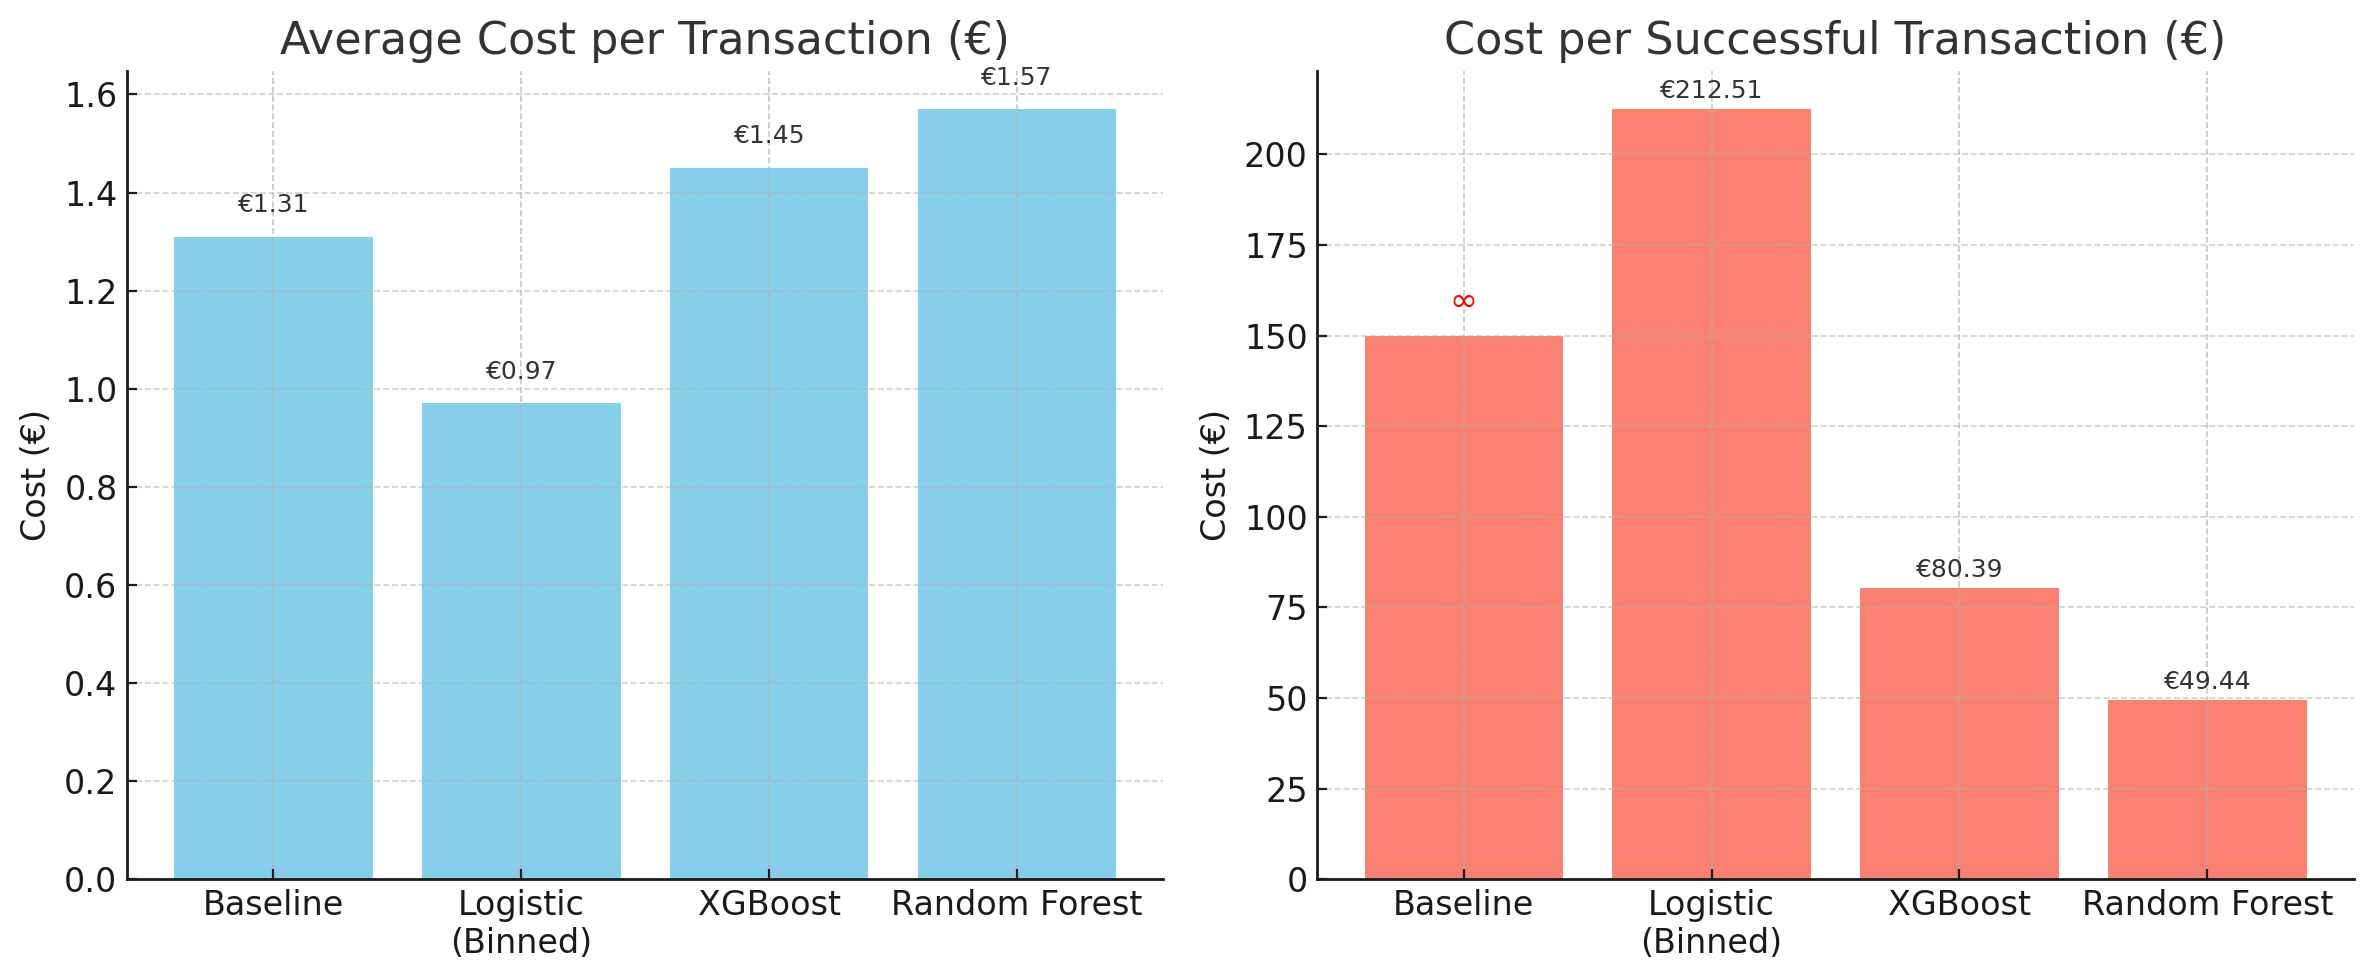

# 6- Feature Importance

Measuring the importance of the individual features in the best model (Random Forest)

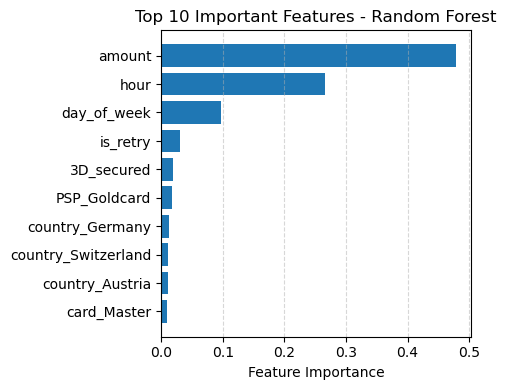

In [34]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train_rf.columns

# Creating DataFrame to sort and visualize
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting top 10 important features
top_n = 10
plt.figure(figsize=(5,4))
plt.barh(importance_df['Feature'].head(top_n)[::-1], importance_df['Importance'].head(top_n)[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features - Random Forest")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# 7- Error Analysis

In [35]:
# Labeling Error Types
# Starting from the eval_df we used for Random Forest cost evaluation
error_df = eval_df.copy()  

# Classifying error type
def classify_error(row):
    if row['actual_success'] == 1 and row['pred_success'] == 1:
        return 'True Positive'
    elif row['actual_success'] == 0 and row['pred_success'] == 0:
        return 'True Negative'
    elif row['actual_success'] == 0 and row['pred_success'] == 1:
        return 'False Positive'
    else:  # actual = 1, predicted = 0
        return 'False Negative'

error_df['error_type'] = error_df.apply(classify_error, axis=1)

# Counting error types
error_counts = error_df['error_type'].value_counts()

# Analyzing False Negatives
# Filter false negatives
false_negatives = error_df[error_df['error_type'] == 'False Negative']

# Analyzing False Positives
false_positives = error_df[error_df['error_type'] == 'False Positive']

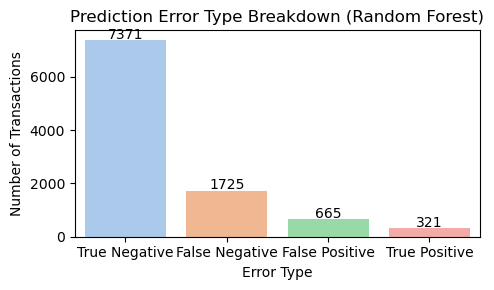

In [36]:
# Plotting Error Type Breakdown
error_counts = error_df['error_type'].value_counts()

plt.figure(figsize=(5,3))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='pastel')
plt.title("Prediction Error Type Breakdown (Random Forest)")
plt.ylabel("Number of Transactions")
plt.xlabel("Error Type")
for i, v in enumerate(error_counts.values):
    plt.text(i, v + 50, str(v), ha='center')
plt.tight_layout()
plt.show()

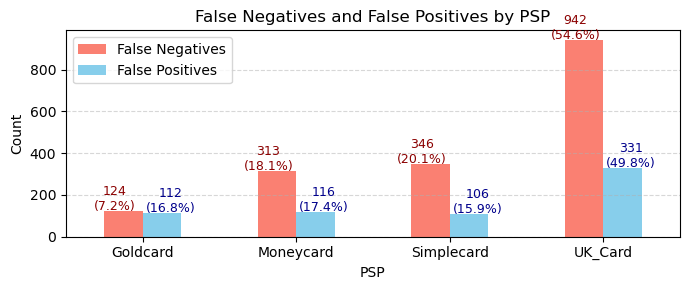

In [37]:
# FP & FN by PSP (Top Mistakes)

# Filtering error types
false_negatives = error_df[error_df['error_type'] == 'False Negative']
false_positives = error_df[error_df['error_type'] == 'False Positive']

# Counting errors by PSP
fn_psp_counts = false_negatives['PSP_name'].value_counts()
fp_psp_counts = false_positives['PSP_name'].value_counts()

# Combining and filling missing values
psp_error_df = pd.DataFrame({
    'False Negatives': fn_psp_counts,
    'False Positives': fp_psp_counts
}).fillna(0)

# Calculating totals for percentages
fn_total = psp_error_df['False Negatives'].sum()
fp_total = psp_error_df['False Positives'].sum()

# Plotting
ax = psp_error_df.plot(kind='bar', figsize=(7,3), color=['salmon', 'skyblue'])
plt.title("False Negatives and False Positives by PSP")
plt.ylabel("Count")
plt.xlabel("PSP")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding count and % annotations
for i, (fn_val, fp_val) in enumerate(zip(psp_error_df['False Negatives'], psp_error_df['False Positives'])):
    fn_pct = (fn_val / fn_total) * 100
    fp_pct = (fp_val / fp_total) * 100
    plt.text(i - 0.18, fn_val + 5, f"{int(fn_val)}\n({fn_pct:.1f}%)", ha='center', fontsize=9, color='darkred')
    plt.text(i + 0.18, fp_val + 5, f"{int(fp_val)}\n({fp_pct:.1f}%)", ha='center', fontsize=9, color='darkblue')

plt.tight_layout()
plt.show()

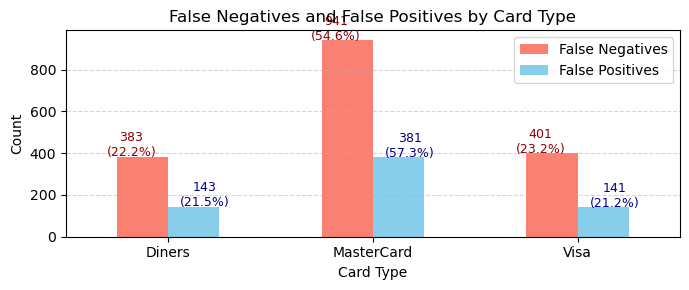

In [38]:
# False Negatives & False Positives by Card Type

# Card mapping from one-hot columns
def get_card(row):
    if 'card_Master' in row and row['card_Master'] == 1:
        return 'MasterCard'
    elif 'card_Visa' in row and row['card_Visa'] == 1:
        return 'Visa'
    elif 'card_Diners' in row and row['card_Diners'] == 1:
        return 'Diners'
    return 'Unknown'

# Applying mapping
error_df['card_type'] = error_df.apply(get_card, axis=1)

# Counting FNs and FPs by card type
fn_card = error_df[error_df['error_type'] == 'False Negative']['card_type'].value_counts()
fp_card = error_df[error_df['error_type'] == 'False Positive']['card_type'].value_counts()

# Combining and filling
card_error_df = pd.DataFrame({
    'False Negatives': fn_card,
    'False Positives': fp_card
}).fillna(0)

# Calculating totals
fn_total = card_error_df['False Negatives'].sum()
fp_total = card_error_df['False Positives'].sum()

# Plotting
ax = card_error_df.plot(kind='bar', figsize=(7,3), color=['salmon', 'skyblue'])
plt.title("False Negatives and False Positives by Card Type")
plt.ylabel("Count")
plt.xlabel("Card Type")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding annotations
for i, (fn_val, fp_val) in enumerate(zip(card_error_df['False Negatives'], card_error_df['False Positives'])):
    fn_pct = (fn_val / fn_total) * 100 if fn_total > 0 else 0
    fp_pct = (fp_val / fp_total) * 100 if fp_total > 0 else 0
    plt.text(i - 0.18, fn_val + 2, f"{int(fn_val)}\n({fn_pct:.1f}%)", ha='center', fontsize=9, color='darkred')
    plt.text(i + 0.18, fp_val + 2, f"{int(fp_val)}\n({fp_pct:.1f}%)", ha='center', fontsize=9, color='darkblue')

plt.tight_layout()
plt.show()

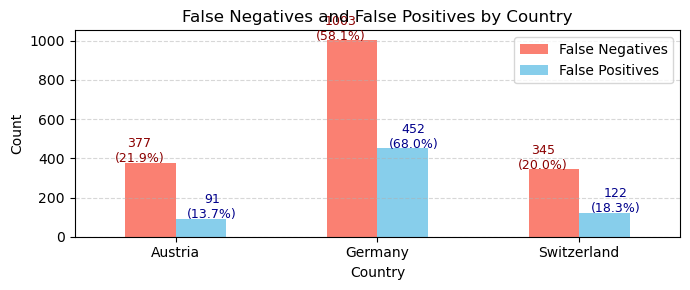

In [39]:
# False Negatives & False Positives by Country

# Country mapping from one-hot encoded columns
def get_country(row):
    if 'country_Germany' in row and row['country_Germany'] == 1:
        return 'Germany'
    elif 'country_Switzerland' in row and row['country_Switzerland'] == 1:
        return 'Switzerland'
    elif 'country_Austria' in row and row.get('country_Austria', 0) == 1:
        return 'Austria'
    return 'Unknown'

# Applying mapping
error_df['country'] = error_df.apply(get_country, axis=1)

# Counting FNs and FPs by country
fn_country = error_df[error_df['error_type'] == 'False Negative']['country'].value_counts()
fp_country = error_df[error_df['error_type'] == 'False Positive']['country'].value_counts()

# Combining and filling missing
country_error_df = pd.DataFrame({
    'False Negatives': fn_country,
    'False Positives': fp_country
}).fillna(0)

# Calculating totals for %
fn_total = country_error_df['False Negatives'].sum()
fp_total = country_error_df['False Positives'].sum()

# Plotting
ax = country_error_df.plot(kind='bar', figsize=(7,3), color=['salmon', 'skyblue'])
plt.title("False Negatives and False Positives by Country")
plt.ylabel("Count")
plt.xlabel("Country")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotating with counts + %
for i, (fn_val, fp_val) in enumerate(zip(country_error_df['False Negatives'], country_error_df['False Positives'])):
    fn_pct = (fn_val / fn_total) * 100 if fn_total > 0 else 0
    fp_pct = (fp_val / fp_total) * 100 if fp_total > 0 else 0
    plt.text(i - 0.18, fn_val + 2, f"{int(fn_val)}\n({fn_pct:.1f}%)", ha='center', fontsize=9, color='darkred')
    plt.text(i + 0.18, fp_val + 2, f"{int(fp_val)}\n({fp_pct:.1f}%)", ha='center', fontsize=9, color='darkblue')

plt.tight_layout()
plt.show()